<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/POS/IA/Feature%20Engineering/20240311_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Carga de bibliotecas
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

<Axes: xlabel='wt_log', ylabel='mpg'>

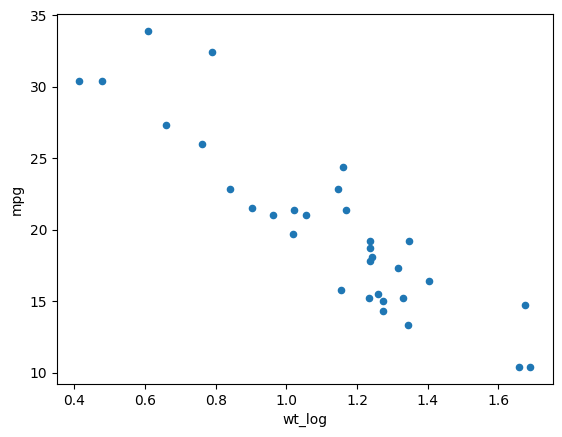

In [42]:
# análise de correlação
# df[['wt','mpg']].corr(). # corr. entre mpg e wt
# df.plot.scatter(x='wt', y='mpg')
df['wt_log'] = np.log(df['wt'])
df[['wt_log','mpg']].corr()

df.plot.scatter(x='wt_log', y='mpg')

In [143]:
# Função de transf. polinomial
poly = skpp.PolynomialFeatures(17) # O parâmetro é o grau do polinômio

In [145]:
# Separação (split)
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=1)

# Visualização do modelo "ajustado" em treino x teste
dfPlot = x_treino.copy(deep=True) # Deep = true "força" uma cópia real, em detrimento a uma referência do dataset origem
dfPlot['mpg'] = y_treino
dfPlot['sample'] = '0.13'

dfteste = x_teste.copy(deep=True)
dfteste['mpg'] = y_teste
dfteste['sample'] = '0.77'

dfPlot = dfPlot.append(dfteste)

x_treino, x_teste = poly.fit_transform(x_treino), poly.fit_transform(x_teste)

<ipython-input-145-2232e0080d02>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPlot = dfPlot.append(dfteste)


In [146]:
# Regressão Linear
mod = LinearRegression()
mod.fit(x_treino, y_treino)

# R2
print(mod.score(x_treino, y_treino))

0.9775148407883342


In [147]:
# Previsão
y_prev = mod.predict(x_teste)
print(mean_squared_error(y_teste, y_prev))

764.1981445684569


<ipython-input-148-b46d8a12c2fa>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfPlot = dfPlot.append(df_fit)


<Axes: xlabel='wt', ylabel='mpg'>

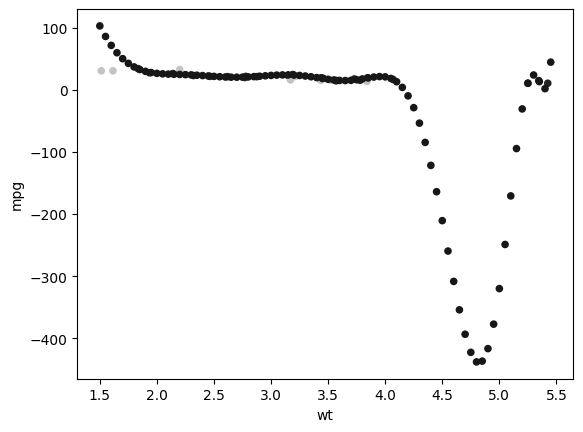

In [148]:
# Geração dos dados para visualização gráfica da "curva" do modelo
x_fit = np.arange(1.5, 5.5,0.05)
df_fit = pd.DataFrame({'wt':x_fit})
x_fit = poly.fit_transform(df_fit)

y_fit = mod.predict(x_fit)

df_fit['mpg']=y_fit
df_fit['sample']= '0.09'

dfPlot = dfPlot.append(df_fit)
dfPlot.plot.scatter(x = 'wt', y='mpg', c='sample')

Transformação Log para análise de distribuição

In [2]:
# Carga de bibliotecas
import pandas as pd
import numpy as np

In [3]:
# Carga de dados
rf = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/db_Exercicio_RFM.csv")
rf

,Unnamed: 0,CUSTOMER_ID,STORE_ID,PRODUCT_ID,AMOUNT,DATE
0,1,95595791691,409,196282,8.98,2020-01-01 00:14:41 UTC
1,2,8814812624,62,136956,0.00,2020-01-01 00:10:16 UTC
2,3,38552620634,408,329,9.98,2020-01-01 00:08:29 UTC
3,4,11561694614,405,104089,7.99,2020-01-01 00:06:10 UTC
4,5,1216506698,62,196180,11.96,2020-01-01 00:05:30 UTC
...,...,...,...,...,...,...
92289,92290,10264569679,417,160178,2.15,2019-11-08 10:29:32 UTC
92290,92291,74199480625,405,194991,2.99,2019-11-08 10:29:22 UTC
92291,92292,60400722615,415,185621,4.30,2019-11-08 10:27:06 UTC
92292,92293,3623837660,65,193506,6.29,2019-11-08 10:16:58 UTC


<Axes: xlabel='sum', ylabel='count'>

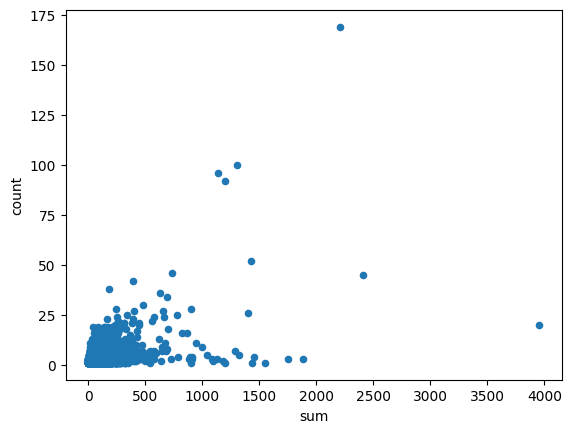

In [4]:
dfAgg = rf.groupby(by=['CUSTOMER_ID'])['AMOUNT'].agg(['sum', 'count'])
dfAgg.plot.scatter(x='sum',y='count')

array([[<Axes: title={'center': 'count'}>]], dtype=object)

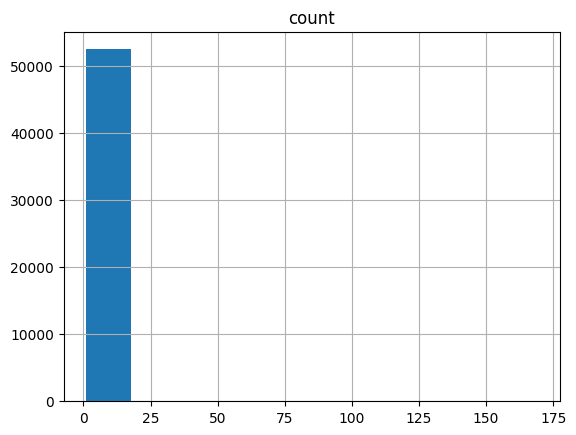

In [157]:
dfAgg.hist('count')

array([[<Axes: title={'center': 'sum'}>]], dtype=object)

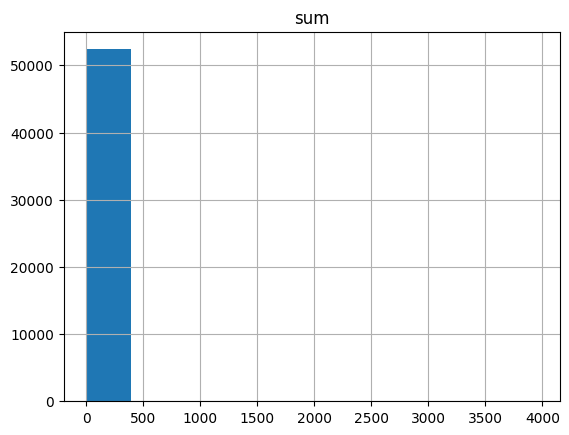

In [158]:
dfAgg.hist('sum')

In [159]:
!pip install datashader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 8.2 MB/s eta 0:00:00


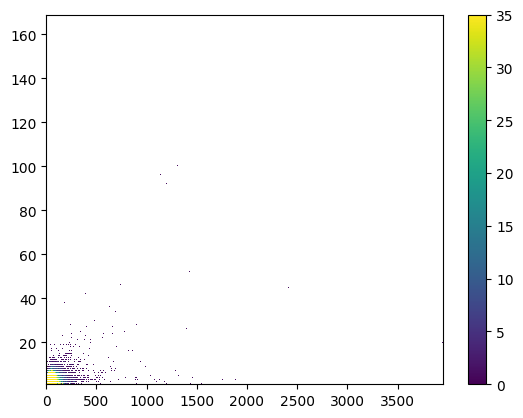

In [5]:
# Visualização do scatterplot com DENSIDADE para análise de volume de dados

import datashader as ds
from datashader.mpl_ext import dsshow
import matplotlib.pyplot as plt

def using_shader(ax, x, y):
  df = pd.DataFrame(dict(x=x, y=y))
  dsa = dsshow(
      df,
      ds.Point("x", "y"),
      ds.count(),
      vmin = 0,
      vmax=35,
      norm='linear',
      aspect="auto",
      ax = ax
  )

  plt.colorbar(dsa)

fig, ax = plt.subplots()
using_shader(ax, dfAgg['sum'].values, dfAgg['count'].values)



In [14]:
x = dfAgg['sum'].values
x[x==0]=0.0001

x_log = np.log(x)
y_log = np.log(dfAgg['count'].values)

In [15]:
dfAgg['count_log'] = y_log
dfAgg['sum_log'] = x_log

array([[<Axes: title={'center': 'count_log'}>]], dtype=object)

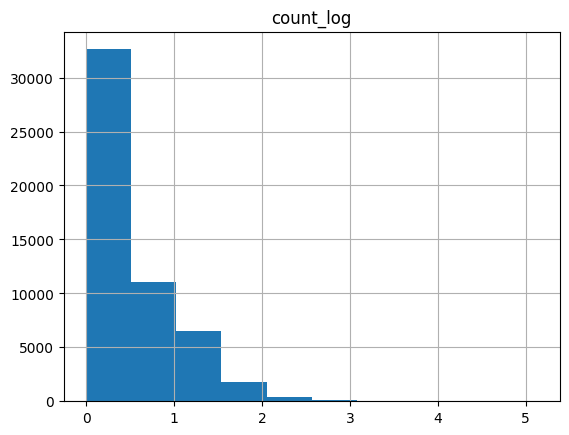

In [16]:
dfAgg.hist('count_log')

array([[<Axes: title={'center': 'sum_log'}>]], dtype=object)

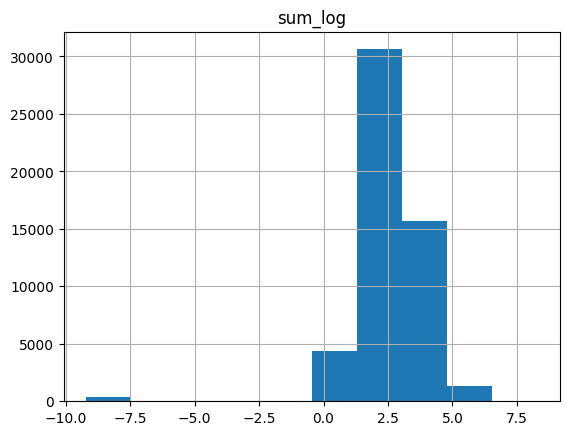

In [17]:
dfAgg.hist('sum_log')

Tratamento de features - aplicando cálculos em várias variáveis

In [20]:
import pandas as pd
di = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv')
di.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
# Aplicando cálculos em várias variáveis
ndi = di.max()

id = 1

for i in ndi:
  nc = 'max_'+ndi.index[id-1]
  di[nc]=i
  id = id+1

In [30]:
di.shape

(53940, 38)